In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [134]:
x,y= load_diabetes(return_X_y=True, as_frame=True)

In [135]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [136]:
x.shape

(442, 10)

In [137]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)   

In [139]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

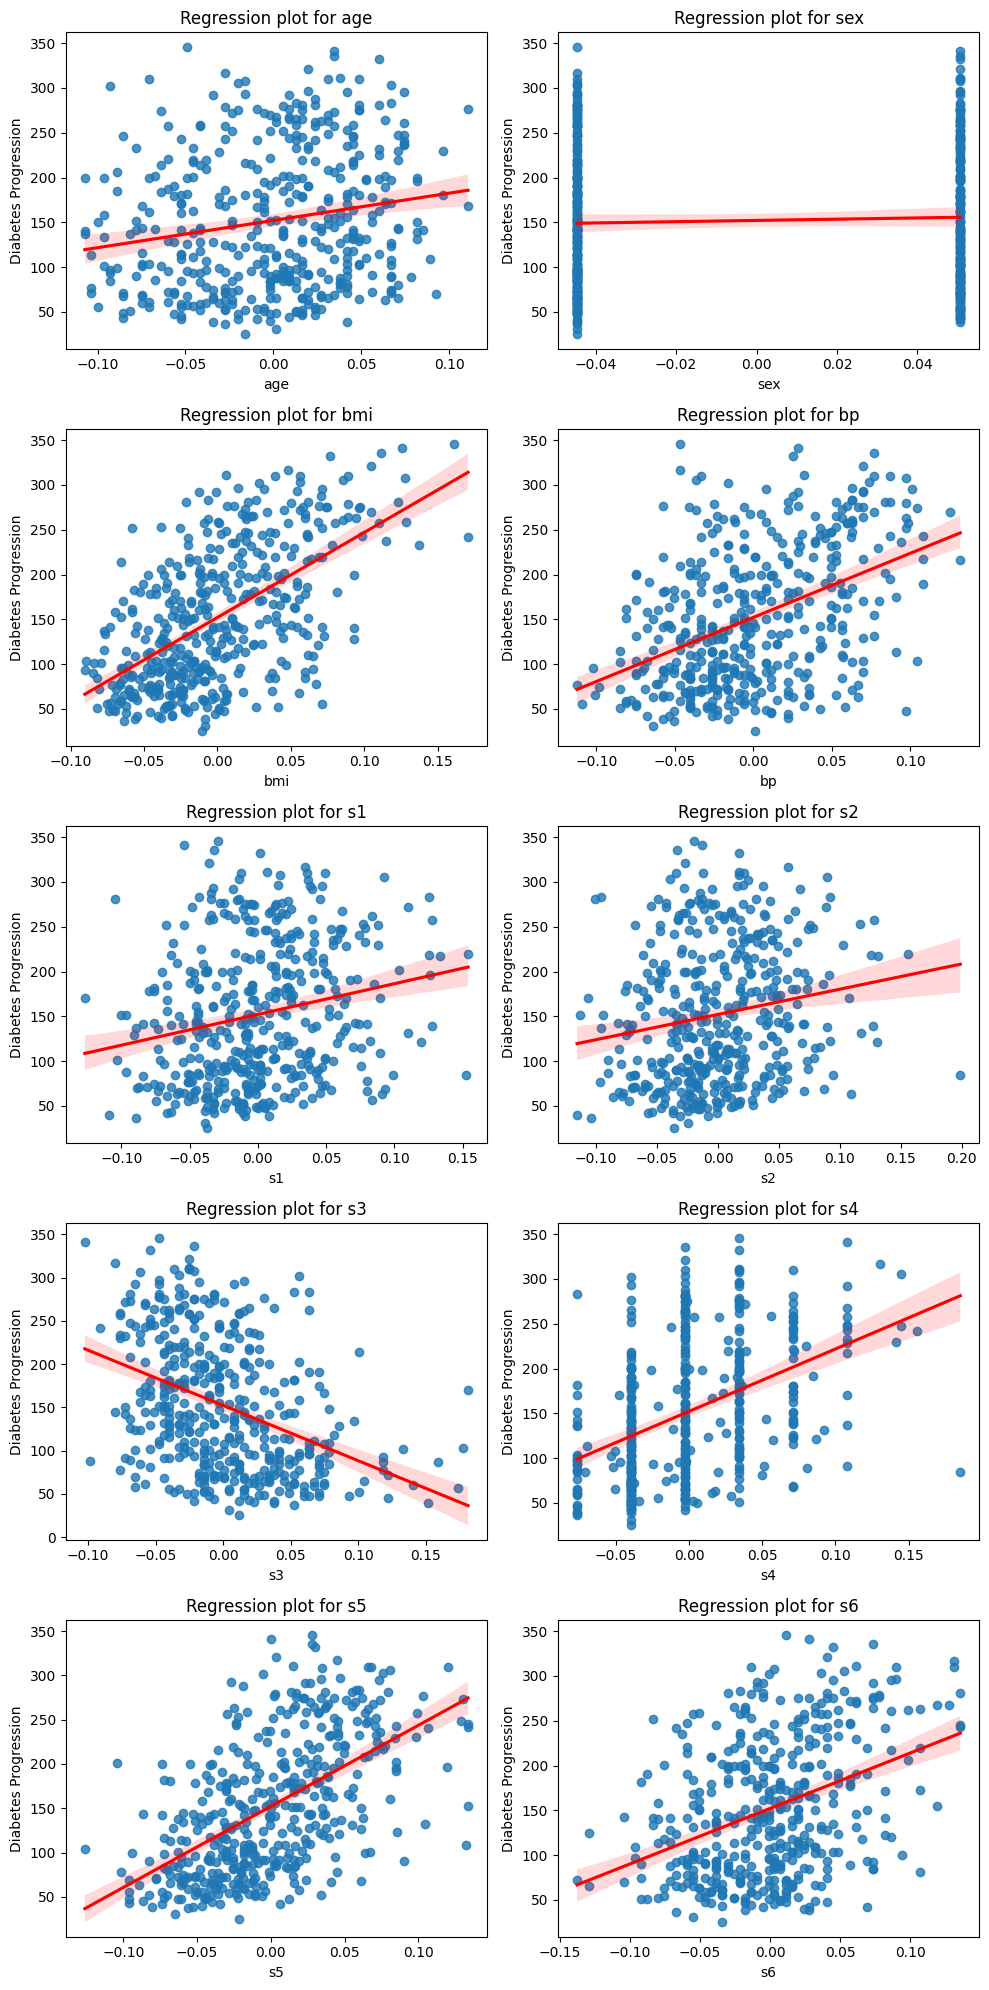

In [140]:
#regression subplot for all the x variables

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
for i, col in enumerate(x.columns):
    sns.regplot(x=x[col], y=y, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Regression plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Diabetes Progression')
plt.tight_layout()
plt.show()



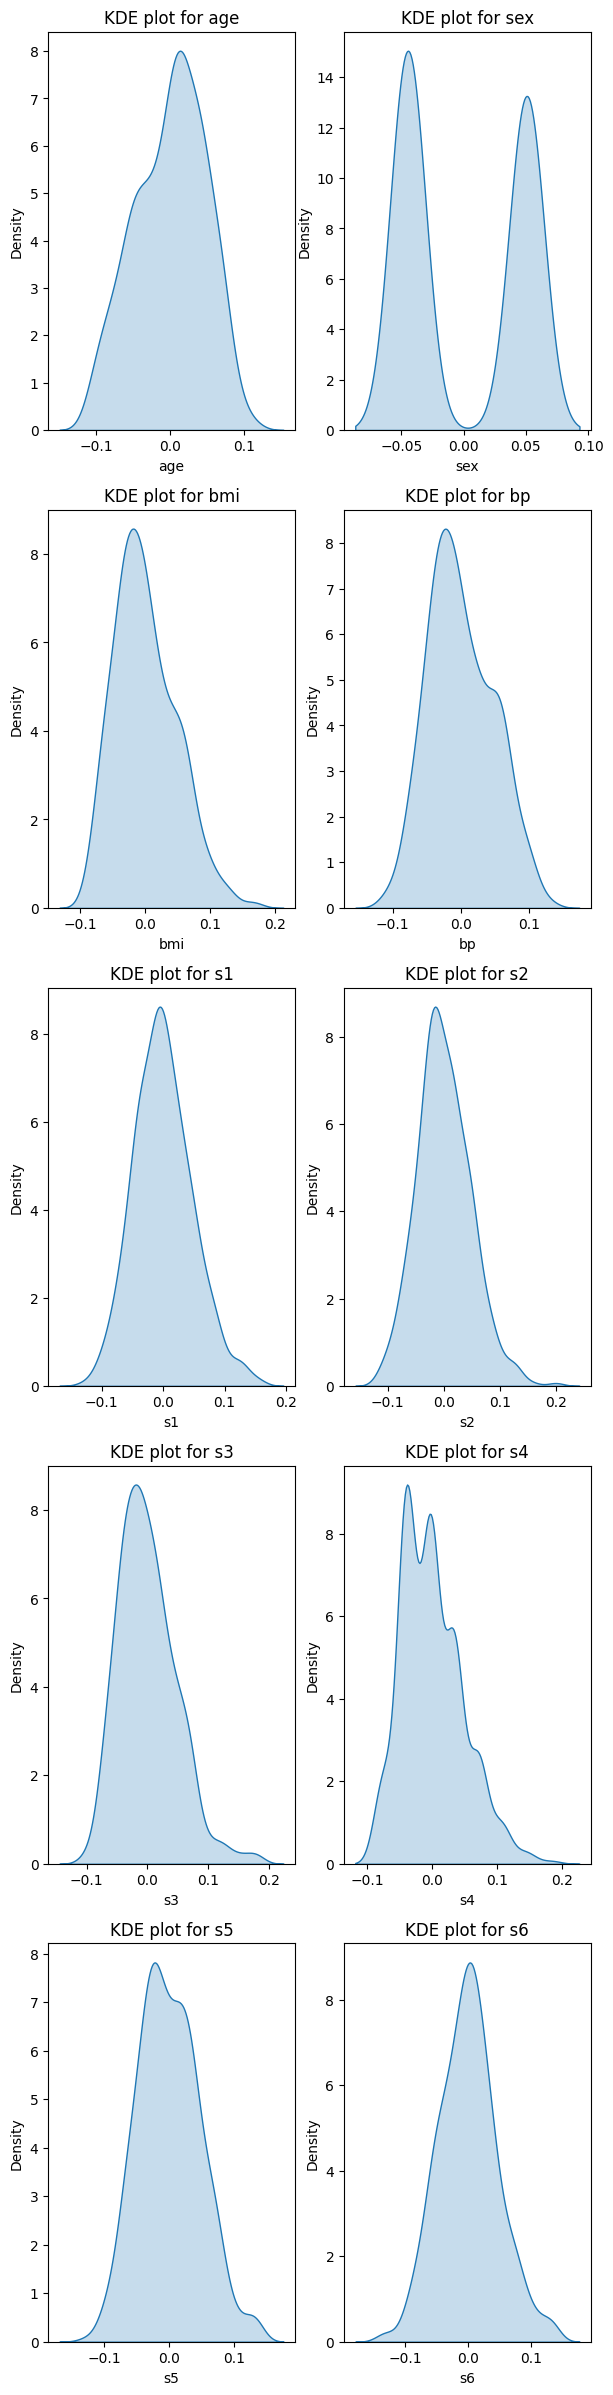

In [ ]:
#subplot for kde of all x features
fig, axes = plt.subplots(5, 2, figsize=(7, 30))
axes = axes.flatten()
for i, col in enumerate(x.columns):
    sns.kdeplot(x[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

In [142]:
lr.coef_

array([ -67.16308558, -244.0456999 ,  509.15636468,  305.70665091,
       -449.72246545,  217.82622156,  -49.52742566,   56.3929511 ,
        663.25035342,   82.20307496])

In [143]:
lr.intercept_

np.float64(152.8843799440393)

In [144]:
#r2 score
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R2 Score: 0.5771689611166474
Mean Squared Error: 3212.5946459150637


In [145]:
#apply yeo-jhonson to x["sex"]
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')


In [146]:
x2=x

In [147]:

x2["sex"]=pt.fit_transform(x2[["sex"]])
x2["s4"]= pt.fit_transform(x2[["s4"]])


In [148]:
x2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1.065488,0.061696,0.021872,-0.044223,-0.034821,-0.043401,0.083012,0.019907,-0.017646
1,-0.001882,-0.938537,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.841899,-0.068332,-0.092204
2,0.085299,1.065488,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,0.083012,0.002861,-0.025930
3,-0.089063,-0.938537,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.824670,0.022688,-0.009362
4,0.005383,-0.938537,-0.036385,0.021872,0.003935,0.015596,0.008142,0.083012,-0.031988,-0.046641


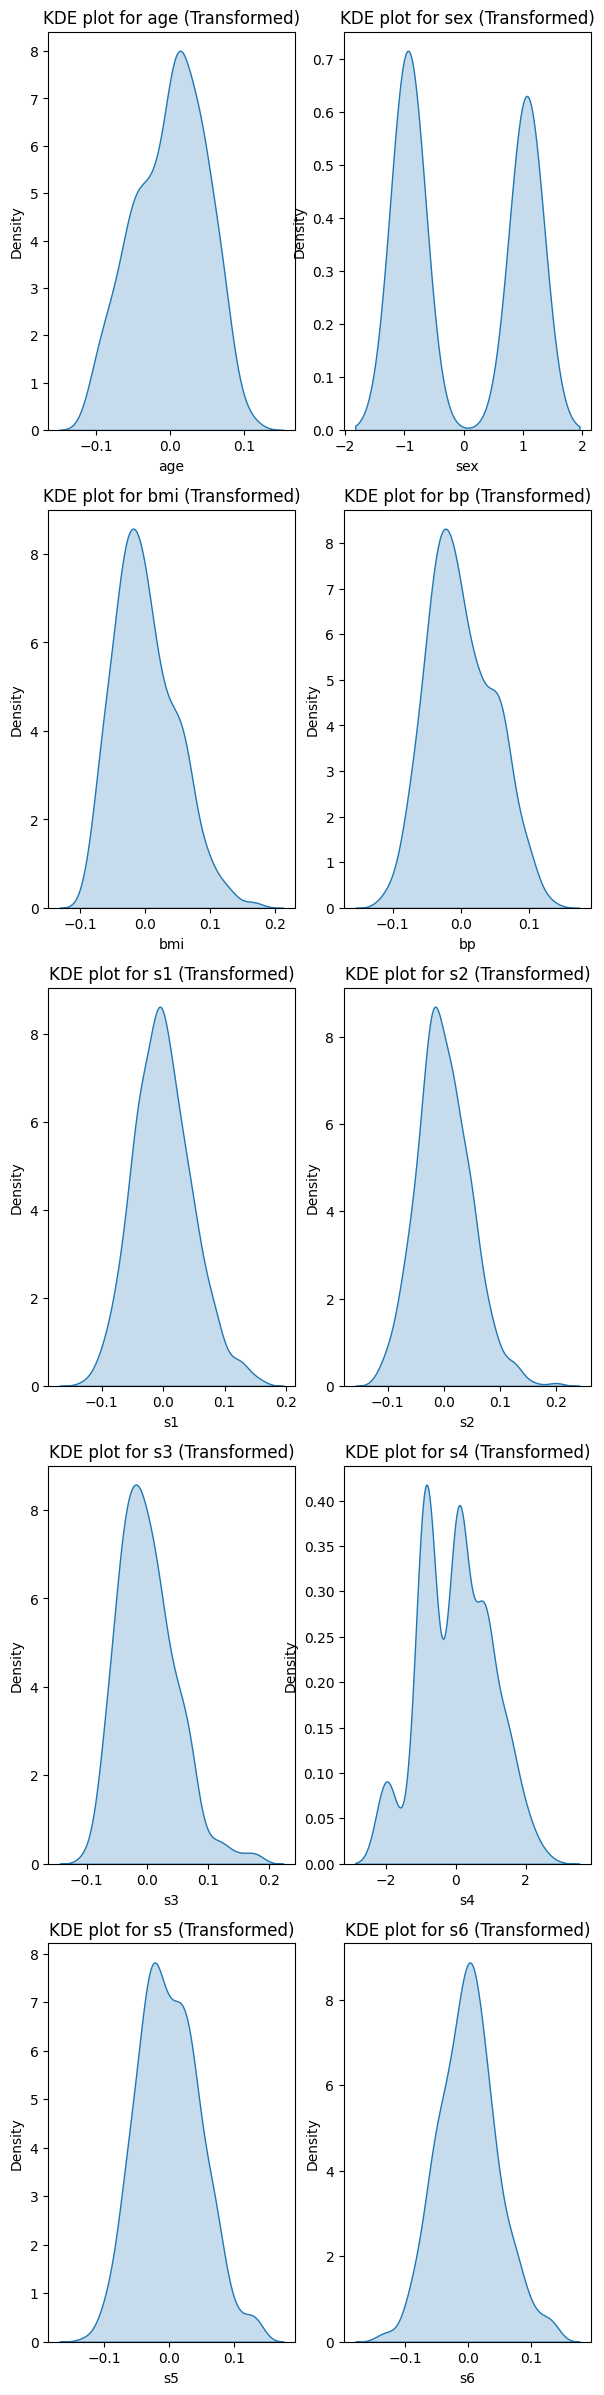

In [150]:
#kde plot for transformed x2 features
fig, axes = plt.subplots(5, 2, figsize=(7, 30))
axes = axes.flatten()
for i, col in enumerate(x2.columns):
    sns.kdeplot(x2[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE plot for {col} (Transformed)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')